Majority file name: ../data/processed/abstracts/co_1952_majority.p



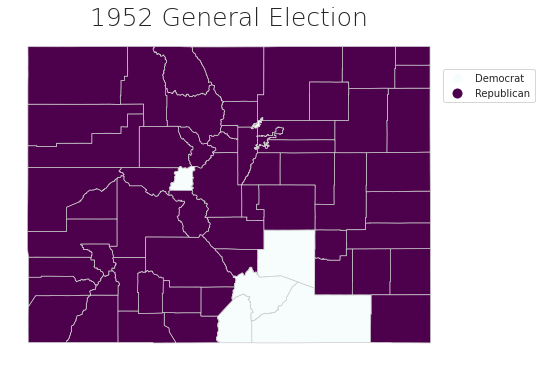

Majority file name: ../data/processed/abstracts/co_1956_majority.p



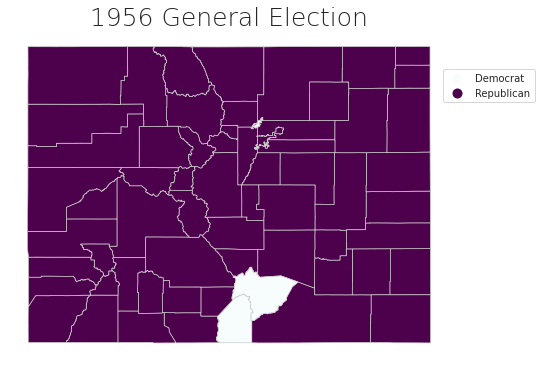

Majority file name: ../data/processed/abstracts/co_1960_majority.p



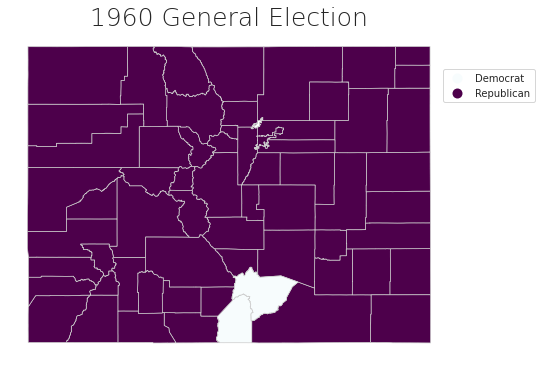

Majority file name: ../data/processed/abstracts/co_1964_majority.p



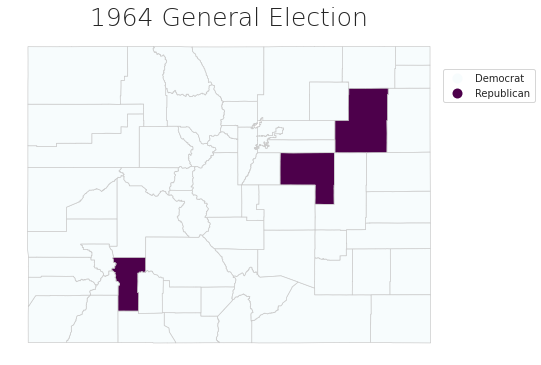

Majority file name: ../data/processed/abstracts/co_1968_majority.p



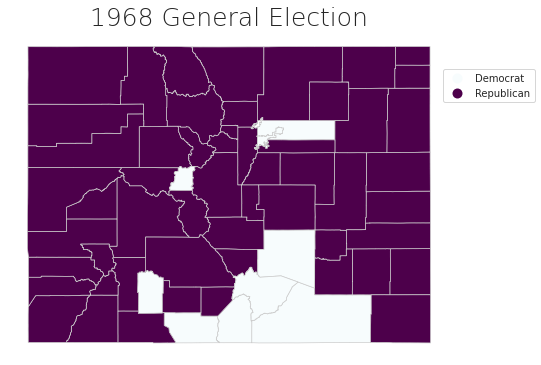

Majority file name: ../data/processed/abstracts/co_1972_majority.p



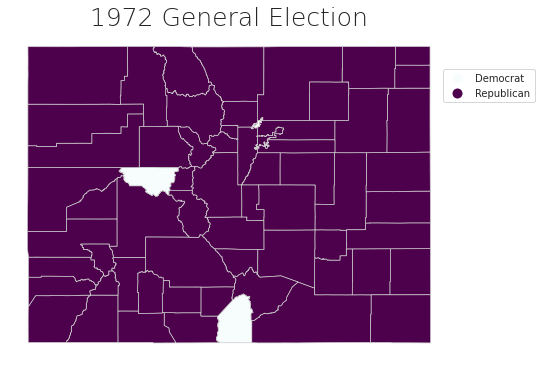

Majority file name: ../data/processed/abstracts/co_1976_majority.p



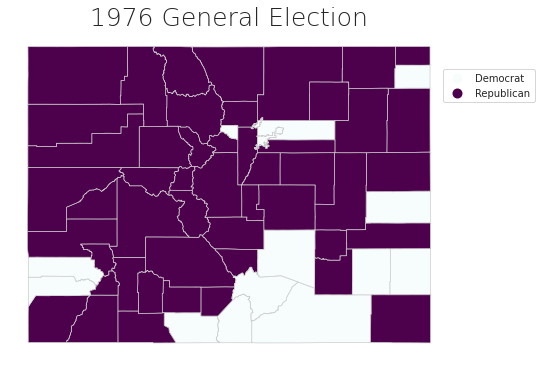

Majority file name: ../data/processed/abstracts/co_1980_majority.p



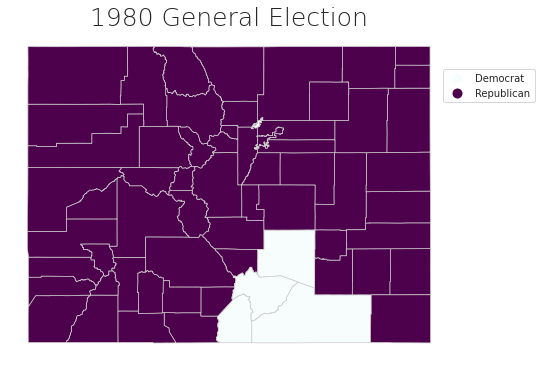

Majority file name: ../data/processed/abstracts/co_2020_majority.p



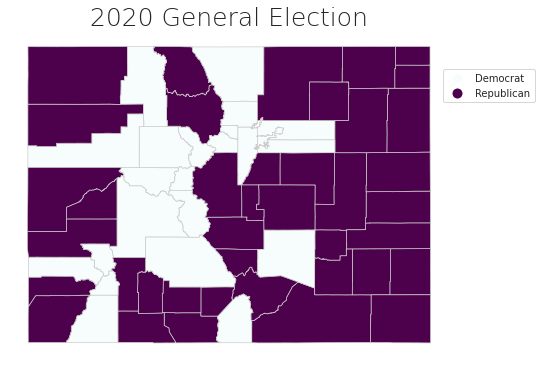

In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import censusFunctions as cf
import pickle
import os


def gen_colorado_red_blue_map(dfi, title, f_name):


    sns.set_style('whitegrid')
    data_df = dfi.copy(deep = True)
    
    # This is the baseline map for all of our choropleth maps - Colorado counties.
    fp =  '../data/shape/Colorado_County_Boundaries.shp'
    map_df = gpd.read_file(fp)

    # change the data types of the key index fields to integer so that it matches our census data index
    map_df = map_df.astype({"CNTY_FIPS": int, "US_FIPS": int})
    map_df.reset_index(drop=True,inplace=True)
    
    data_df = data_df.rename(columns={"state_id": "STATEFP", "county_id": "CNTY_FIPS"})
    data_df['CNTY_FIPS'] = data_df['CNTY_FIPS'].astype(int)

    merged = map_df.set_index(['CNTY_FIPS']).join(data_df.set_index(['CNTY_FIPS']))
    merged = merged.drop(index = 14)
    
    # Plotting the election results
    # Create an array with the colors you want to use
    colors = ["#EFDECD","#031cfc"]
    # Set your custom color palette
    customPalette = sns.set_palette(sns.color_palette(colors))

    fig, ax = plt.subplots(1,figsize=(10, 6))
    ax.axis('off')
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    merged.plot(column='Majority', linewidth=0.7,ax=ax,cmap = 'BuPu', edgecolor='0.8', legend=True)
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((1, 0.7, 0.2, 0.2))
    plt.show()
    #fig.savefig(“map_export.png”, dpi=300)
    return

yr_list = ["1952", "1956", "1960", "1964", "1968", "1972", "1976", "1980", "2020"] 
file_dict  = {int(yr):'../data/processed/abstracts/co_' + yr + '_majority.p' for yr in yr_list }


for yr in yr_list:
    fn = file_dict[int(yr)]
    print(f'Majority file name: {fn}\n')
    dfi = cf.load_pickled_df(fn)
    gen_colorado_red_blue_map(dfi, yr + " General Election", yr)

In [6]:
?sns.plot

Object `sns.plot` not found.


In [9]:
help(sns.colors)

Help on package seaborn.colors in seaborn:

NAME
    seaborn.colors

PACKAGE CONTENTS
    crayons
    xkcd_rgb

DATA
    crayons = {'Almond': '#EFDECD', 'Antique Brass': '#CD9575', 'Apricot':...
    xkcd_rgb = {'acid green': '#8ffe09', 'adobe': '#bd6c48', 'algae': '#54...

FILE
    /home/jdreed/miniconda3/envs/msds696_env/lib/python3.7/site-packages/seaborn/colors/__init__.py




In [2]:
dfi

,County,Democrat,Republican,Blankenship_Mohr,Hammons_Bodenstab,Hawkins_Walker,Reppct,Dempct,Majority,CNTY_FIPS
0,Adams,134202,95657,455,264,744,41.615512,58.384488,Democrat,001
1,Alamosa,3759,3813,22,6,23,50.356577,49.643423,Republican,003
2,Arapahoe,213673,127356,503,328,926,37.344625,62.655375,Democrat,005
3,Archuleta,3738,5189,20,9,19,58.127030,41.872970,Republican,007
4,Baca,317,1866,2,0,3,85.478699,14.521301,Republican,009
...,...,...,...,...,...,...,...,...,...,...
59,Summit,12620,5319,16,14,60,29.650482,70.349518,Democrat,117
60,Teller,5278,11241,28,10,25,68.048913,31.951087,Republican,119
61,Washington,369,2595,4,2,5,87.550607,12.449393,Republican,121
62,Weld,66050,96133,363,170,340,59.274400,40.725600,Republican,123


In [3]:
file_dict[1952]

'../data/processed/abstracts/co_1952_majority.p'